In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

In [2]:
# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
city_data.head(1)

,city,driver_count,type
0,Richardfort,38,Urban


In [3]:
ride_data = pd.read_csv(ride_data_to_load)
ride_data.head(1)

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873


In [4]:
# Combine the data into a single dataset

pyber_df = pd.merge(city_data, ride_data, on="city", how="left")
pyber_df.head(1)

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794


## Bubble Plot of Ride Sharing Data

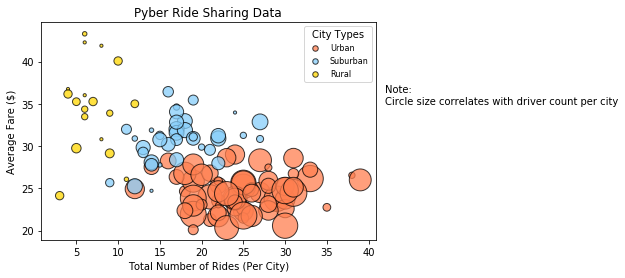

In [5]:
# Obtain the x and y coordinates for each of the three city types
#City Types: Urban, Rural, Suburban
urban_type = pyber_df[pyber_df["type"] == "Urban"].groupby([pyber_df["city"]])
suburban_type = pyber_df[pyber_df["type"]== "Suburban"].groupby([pyber_df["city"]])
rural_type = pyber_df[pyber_df["type"]=="Rural"].groupby([pyber_df["city"]])

urban_x = urban_type["ride_id"].count()
urban_y = urban_type["fare"].mean()
urban_size = urban_type["driver_count"].mean()

suburban_x = suburban_type["ride_id"].count()
suburban_y = suburban_type["fare"].mean()
suburban_size = suburban_type["driver_count"].mean()

rural_x = rural_type["ride_id"].count()
rural_y = rural_type["fare"].mean()
rural_size = rural_type["driver_count"].mean()

# Build the scatter plots for each city types
plt.scatter(urban_x, urban_y, label = "Urban", s=urban_size * 10,
            color=["coral"], edgecolor="black", alpha = 0.75, marker = "o")

plt.scatter(suburban_x, suburban_y, label="Suburban", s=suburban_size * 10,
            color =["lightskyblue"], edgecolor="black", alpha=0.75, marker="o")

plt.scatter(rural_x, rural_y, label = "Rural", s=rural_size * 10, 
            color=["gold"], edgecolor="black", alpha = 0.75, marker = "o")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
legend = plt.legend(fontsize=8, title="City Types", loc="best")

legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

#Incorporate a text label regarding cicrle size
plt.text(42,35,"Note: \nCircle size correlates with driver count per city", fontsize = 10)

#Save figure
plt.savefig("PyberRideSharingData.png")

# Show plot
plt.show()

## Total Fares by City Type

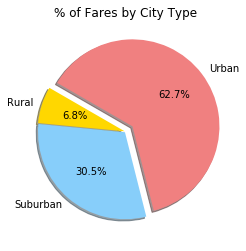

In [9]:
#Columns: city, driver_count,type,date,fare,ride_id
# Calculate Type Percents
city_type = pyber_df.groupby(["type"])
total_fare = city_type["fare"].sum()

# Build Pie Chart
labels = ["Rural", "Suburban","Urban"] 
explode = (0.01, 0.01, 0.1)
colors = ["gold","lightskyblue","lightcoral"]
plt.pie(total_fare, explode=explode, labels=labels, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=150) 

plt.title ("% of Fares by City Type")

# Save Figure
plt.savefig("PercentageofFaresbyCityType.png")

# Show Figure
plt.show()

## Total Rides by City Type

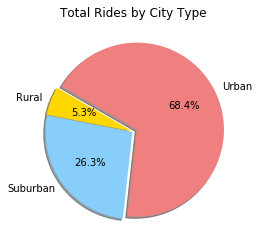

In [7]:
#Columns: city, driver_count,type,date,fare,ride_id
# Calculate Ride Percents
city_type = pyber_df.groupby(["type"])

rides_perc = city_type["ride_id"].count()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.01, 0.01, 0.05)
plt.pie(rides_perc, labels=labels, colors=colors, explode=explode,
           autopct="%1.1f%%", shadow=True, startangle=150)

plt.title("Total Rides by City Type")



# Save Figure
plt.savefig("Total Rides by City Type")

# Show Figure
plt.show()

## Total Drivers by City Type

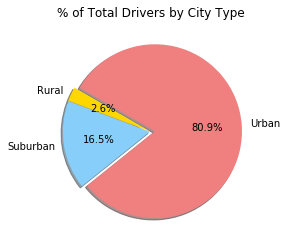

In [8]:
#city_type = pyber_df.groupby[("type")]
typegrouped=city_data.groupby(['type'])
total_drivers = typegrouped["driver_count"].sum()

labels=["Rural", "Suburban", "Urban"]
colors=["gold", "lightskyblue", "lightcoral"]
explode=(0.01,0.01,0.05)

plt.pie(total_drivers,labels=labels,colors=colors,explode=explode,
       autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")

plt.savefig("% of Total Drivers by City Type")

plt.show()